In [1]:
a = 3
print(a)

3


In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import numpy as np

In [5]:
a = np.array([np.random.randint(10,100,[3,3])])
print(a)

[[[60 89 79]
  [71 49 76]
  [55 89 48]]]


In [6]:
b = torch.from_numpy(a) #将numpy数据转换成tensor类型
print(b)

tensor([[[ 60,  89,  79],
         [ 71,  49,  76],
         [ 55,  89,  48]]], dtype=torch.int32)


In [19]:
c = torch.tensor([3,3])
d = torch.FloatTensor(3)
print(c,d)

tensor([ 3,  3]) tensor(1.00000e-03 *
       [-5.7920,  0.0000,  0.0000])


In [20]:
torch.randn(3,3)  #正态分布种采样

tensor([[-1.1460,  0.1836, -1.2479],
        [-0.2926, -2.8019, -1.2174],
        [ 0.2238,  0.5875,  0.3322]])

In [21]:
torch.randint(1,10,[3,3])

tensor([[ 2.,  3.,  9.],
        [ 9.,  9.,  6.],
        [ 6.,  3.,  1.]])

In [23]:
#以均值为0方差为std从正态分布种生成10个数
torch.normal(mean = torch.full([10],0),std = torch.arange(1,0,-0.1) )

tensor([ 1.7128, -0.2088, -0.2647,  0.1972,  0.4950, -0.6096, -0.3149,
         0.2770,  0.0547, -0.0502])

In [24]:
torch.full([2,3],7)

tensor([[ 7.,  7.,  7.],
        [ 7.,  7.,  7.]])

In [25]:
torch.arange(0,10)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [26]:
torch.arange(0,10,2)

tensor([ 0.,  2.,  4.,  6.,  8.])

In [27]:
#等分取值
torch.linspace(0,10,3)

tensor([  0.,   5.,  10.])

In [28]:
torch.ones(3,3)

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [29]:
torch.zeros(3,3)

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [30]:
torch.eye(3,3)

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

In [32]:
a = torch.randint(1,10,[3,3])
torch.ones_like(a)

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [33]:
torch.randperm(10)  #可以起到random.shuffle随机选取样本的作用

tensor([ 9,  1,  5,  8,  4,  3,  2,  6,  0,  7])

In [36]:
a = torch.randint(1,10,[3,3])
b = torch.randint(1,10,[3,3])
print(a,b)
index = torch.randperm(3)
print(index)

tensor([[ 7.,  8.,  5.],
        [ 6.,  5.,  8.],
        [ 5.,  9.,  9.]]) tensor([[ 2.,  7.,  3.],
        [ 7.,  1.,  1.],
        [ 7.,  2.,  9.]])
tensor([ 0,  2,  1])


In [38]:
print(a[index])
print(b[index])

tensor([[ 7.,  8.,  5.],
        [ 5.,  9.,  9.],
        [ 6.,  5.,  8.]])
tensor([[ 2.,  7.,  3.],
        [ 7.,  2.,  9.],
        [ 7.,  1.,  1.]])


# 索引与切片

In [40]:
a = torch.rand(4,3,28,28)
print(a[0].shape,a[0,0].shape,a[0,0,2,4])

torch.Size([3, 28, 28]) torch.Size([28, 28]) tensor(0.9958)


In [41]:
print(a[:2].shape)

torch.Size([2, 3, 28, 28])


In [43]:
print(a[:2,:,:,:].shape)

torch.Size([2, 3, 28, 28])


In [45]:
print(a[:2,:,::2,::2].shape) #::为间隔采样

torch.Size([2, 3, 14, 14])


In [46]:
print(a[1,...].shape)  #...为取其余

torch.Size([3, 28, 28])


In [70]:
a.index_select(3,torch.tensor([1,2])).shape #在第4个维度上取1，2个维度

torch.Size([4, 3, 28, 2])

In [68]:
print(torch.arange(1,2))

tensor([ 1.])


In [71]:
torch.take(a,torch.tensor([3,4,5]))#现将a张量拉平成向量然后在取3，4，5位置的值

tensor([ 0.5754,  0.8057,  0.6423])

# 维度变换

In [72]:
a.shape

torch.Size([4, 3, 28, 28])

In [73]:
print(a.view(4,3,28*28).shape)
print(a.reshape(4,3*28*28).shape)

torch.Size([4, 3, 784])
torch.Size([4, 2352])


In [74]:
a.shape

torch.Size([4, 3, 28, 28])

In [75]:
a.unsqueeze(-1).shape

torch.Size([4, 3, 28, 28, 1])

In [76]:
a.unsqueeze(0).shape

torch.Size([1, 4, 3, 28, 28])

In [77]:
a.squeeze().shape

torch.Size([4, 3, 28, 28])

In [78]:
a.squeeze(0).shape

torch.Size([4, 3, 28, 28])

In [79]:
b = torch.randn(1,1,28,1)

In [82]:
print(b.shape)

torch.Size([1, 1, 28, 1])


In [83]:
b.squeeze().shape #将维数一的维度都挤压掉

torch.Size([28])

In [84]:
b.squeeze(0).shape

torch.Size([1, 28, 1])

In [86]:
b.shape

torch.Size([1, 1, 28, 1])

In [87]:
b.expand(4,4,28,4).shape #扩张时只能扩张维数唯一的维数

torch.Size([4, 4, 28, 4])

In [88]:
b.expand(-1,-1,28,-1).shape #-1是保证维度不变

torch.Size([1, 1, 28, 1])

In [89]:
b.repeat(3,3,10,3).shape

torch.Size([3, 3, 280, 3])

In [90]:
b.shape

torch.Size([1, 1, 28, 1])

# Broadcasting机制
可以应用与加偏置

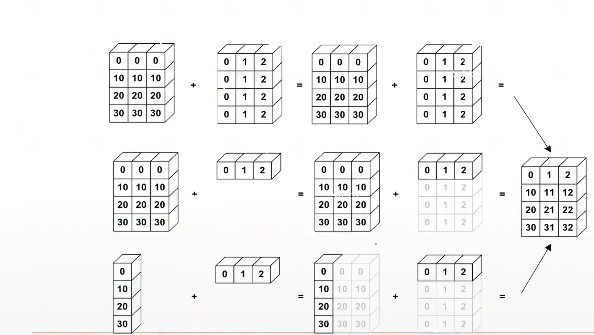

# 合并拼接与拆分

In [93]:
a = torch.rand(4,32,32)
b = torch.rand(5,32,32)
torch.cat([a,b],dim=0).shape

torch.Size([9, 32, 32])

In [97]:
c = torch.rand(4,32,32)
d = torch.stack([a,c],dim=0)
d.shape


torch.Size([2, 4, 32, 32])

In [98]:
e,f = d.split(1,dim=0)
print(e.shape,f.shape)

torch.Size([1, 4, 32, 32]) torch.Size([1, 4, 32, 32])


In [100]:
e,f = d.split([30,2],dim=2)
print(e.shape,f.shape)

torch.Size([2, 4, 30, 32]) torch.Size([2, 4, 2, 32])


# 基本运算

In [104]:
a= torch.ones(2,2)
b = torch.ones(2,2)
print(torch.matmul(a,b)) #matmul适用于高维矩阵相乘
print(a@b)  #矩阵乘法只适用于二维，高纬需要使用transpose
print(a*b)

tensor([[ 2.,  2.],
        [ 2.,  2.]])
tensor([[ 2.,  2.],
        [ 2.,  2.]])
tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [105]:
c = torch.tensor(([1,2,3],[4,5,6],[7,8,9]))
print(c)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]])


In [106]:
print(c.t()) #转置

tensor([[ 1,  4,  7],
        [ 2,  5,  8],
        [ 3,  6,  9]])


In [107]:
a = torch.full([2,2],3)
print(a)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [108]:
a*a

tensor([[ 9.,  9.],
        [ 9.,  9.]])

In [109]:
a**2

tensor([[ 9.,  9.],
        [ 9.,  9.]])

In [110]:
b = a**2
b.sqrt()

tensor([[ 3.,  3.],
        [ 3.,  3.]])

In [112]:
b**(0.5)

tensor([[ 3.,  3.],
        [ 3.,  3.]])

In [114]:
a = torch.exp(torch.ones(2,2))
print(a)

tensor([[ 2.7183,  2.7183],
        [ 2.7183,  2.7183]])


In [115]:
torch.log(a)

tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000]])

In [116]:
b.norm(1) #1范数

tensor(36.)

In [117]:
b.norm(2) #2范数

tensor(18.)

In [118]:
print(b)

tensor([[ 9.,  9.],
        [ 9.,  9.]])


In [121]:
print(b.norm(1,dim=1))

tensor([ 18.,  18.])


In [130]:
c = torch.tensor([[1.0,2.0],[3.0,4.0]])
print(c)
print(c.norm(1,dim=1))

tensor([[ 1.,  2.],
        [ 3.,  4.]])
tensor([ 3.,  7.])


In [131]:
a = torch.arange(8).reshape(2,4).float()
print(a)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.]])


In [132]:
print(a.min(),a.max(),a.mean(),a.prod())

tensor(0.) tensor(7.) tensor(3.5000) tensor(0.)


In [134]:
print(a.sum(),a.argmax(),a.argmin()) #不给出维度会将tensor打平后输出索引

tensor(28.) tensor(7) tensor(0)


In [135]:
a.max(dim=1)

(tensor([ 3.,  7.]), tensor([ 3,  3]))

In [136]:
a.max(dim=1,keepdim=True)

(tensor([[ 3.],
         [ 7.]]), tensor([[ 3],
         [ 3]]))

In [137]:
a.topk(2,dim=1)

(tensor([[ 3.,  2.],
         [ 7.,  6.]]), tensor([[ 3,  2],
         [ 3,  2]]))

In [138]:
a.kthvalue(1,dim=1)  #返回第一小的值及其索引

(tensor([ 0.,  4.]), tensor([ 0,  0]))

In [140]:
a = torch.ones(2,2)
b = torch.full([2,2],2)
print(a,b)

tensor([[ 1.,  1.],
        [ 1.,  1.]]) tensor([[ 2.,  2.],
        [ 2.,  2.]])


In [141]:
c = torch.randn(2,2)
print(c)

tensor([[ 0.4949, -0.1007],
        [-0.7680, -0.8309]])


In [142]:
torch.where(c>0,a,b) # 如果c>0取值为aELSEb

tensor([[ 1.,  2.],
        [ 2.,  2.]])